# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#save">Storing Data</a></li>
<li><a href="#analysis">Analysing and Visualising Data</a></li>
</ul>

<a id='Intro'></a>
## Introduction
This project is about gathering, assessing, wrangling and analysing the data of the twitter handle @dog_rates also known as WeRateDogs.

The data is to be gathered from **three(3)** different sources and in three different formats.

<a id='gathering'></a>
## Data Gathering
In the cell below, I will gather **all** three pieces of data for this project and load them in the notebook.

1. I will directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import json
import tweepy
import datetime
from tweepy import OAuthHandler
from timeit import default_timer as timer
% matplotlib inline 


In [2]:
df_tae = pd.read_csv ('twitter-archive-enhanced-2.csv') 
df_tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. I will use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.status_code

200

In [4]:
with open('image-prediction.tsv', mode='wb') as file:
    file.write(response.content)

In [5]:
df_ip = pd.read_csv ('image-prediction.tsv', sep ='\t') 
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. I will use the Tweepy library to query additional data via the Twitter API (tweet_json.txt). Since my twitter developer account was not approved, I will use the twitter_json.txt from the resources section.

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# tweet_ids = df_tae.tweet_id.values
# len(tweet_ids)

    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:

#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
# end = timer()
# print(end - start)
# print(fails_dict)


In [7]:
frame_list = []
with open('tweet-json.txt', 'r') as open_file:
    for line in open_file.readlines():
        tweet_id = json.loads(line)['id']
        retweet_count = json.loads(line)['retweet_count']
        favorite_count = json.loads(line)['favorite_count']
        frame_list.append([int(tweet_id), retweet_count, favorite_count])
        
columns = ['tweet_id', 'retweet_count', 'favorite_count']
df_api = pd.DataFrame(frame_list, columns = columns)

In [8]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


<a id='assessing'></a>
## Assessing Data
I will assess the three data set, both visually and programatically to check quality and tidiness.

Let's start with the twitter-archive-enhanced.csv dataset

In [9]:
df_tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are 181 retweet data in the DataFrame

In [10]:
df_tae.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Some of the ratings seem invalid,as there is a rating_numerator as high as 1776 .

rating_denominator also have a row with 0 (which invalidates the rating) as well as 

In [11]:
df_tae[df_tae['rating_numerator']==1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [12]:
high_deno = df_tae[df_tae['rating_denominator']>10]
high_deno

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [13]:
high_deno.count()

tweet_id                      20
in_reply_to_status_id          4
in_reply_to_user_id            4
timestamp                     20
source                        20
text                          20
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 17
rating_numerator              20
rating_denominator            20
name                          20
doggo                         20
floofer                       20
pupper                        20
puppo                         20
dtype: int64

20  tweets have rating_denominators greater than 10 out of which 13 rating_numerators are above 20

In [14]:
df_tae.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Let's check out image_prediction file as well

In [15]:
df_ip.shape

(2075, 12)

In [16]:
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_ip.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
df_ip.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

- Let's consider the tweetter API data as well

In [20]:
df_api.shape

(2354, 3)

In [21]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [22]:
df_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [23]:
df_api.duplicated().sum()

0

### Quality issues
1. Retweet data are included in the twitter_archive_enhanced dataset.

2. **timestamp** is string and should be datetime

3. Some rows have denominators greater than 10 

4. Index numbber 979 (tweet_id:749981277374128128) has a rating numerator way too far from 10, that is 1776

5. **name** is inconsistent, as some names start with lower case letters while others start with Upper case and some are invalid names, such as a, an, the and so on

6. **doggo**, **floofer**, **pupper** and **puppo** columns contain 'None' value where 'NaN' should be used.

7. **p1**, **p2** and **p3** are not consistent with naming the dog breeds in terms of capitalising

8. There are different number of observations in the datasets. That is there are 2356 entries in twitter_archive_enhanced.csv, while there are 2075 observations for the image_prediction and the data from twitter api contains 2354 observations.


### Tidiness issues
1. **doggo**, **floofer**, **pupper** and **puppo** ought to be one column as they represent the same thing i.e dog stage
2. The three datasets are about only one item, that is tweets. So, they ought to be one.

<a id='cleaning'></a>
## Cleaning Data
In this section, I will clean **all** of the issues you documented while assessing. 

First and foremost, I will make a copy of the original data before cleaning.

In [24]:
# Make copies of original pieces of data
df_tae_clean = df_tae.copy()
df_ip_clean = df_ip.copy()
df_api_clean = df_api.copy()

### Issue #1:

#### Define:
Drop all retweets

#### Code

In [25]:
df_tae_clean = df_tae_clean[df_tae_clean.retweeted_status_id.isnull()]
df_tae_clean = df_tae_clean[df_tae_clean.retweeted_status_user_id.isnull()]
df_tae_clean = df_tae_clean[df_tae_clean.retweeted_status_timestamp.isnull()]

### Test

In [26]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

Now, I will remove columns not needed for this analysis

In [27]:
# Remove irrelevant columns
df_tae_clean.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp',
                    'expanded_urls'], axis=1, inplace=True)

#### Test

In [28]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Issue #2:

#### Define: 
Change **timestamp** format

#### Code:

In [29]:
# Change timestamp
df_tae_clean.timestamp = pd.to_datetime(df_tae_clean.timestamp, errors='coerce')

#### Test

In [30]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 203.9+ KB


### Issue #3:

#### Define
I will clean invalid dog names in twitter_archive_enhanced by replacing them with 'NaN'.

#### Code

In [31]:
# using str.islower method to locate all non-dog names starting lower case and changing them to NaN
lower_case_names_mask = df_tae_clean.name.str.islower()                 # Get a list of all names in lowercase
column_name = 'name' 
df_tae_clean.loc[lower_case_names_mask , column_name] = np.nan # Set the lower case names to Nan

# using the .replace method to change all 'None' names to NaN
df_tae_clean.name.replace('None', value=np.nan, inplace=True)

#### Test

In [32]:
df_tae_clean.loc[lower_case_names_mask , column_name].sum()

0

### Issue #4:

#### Define 
Correct dog breeds in p1, p2 and p3

#### Code

In [33]:
df_ip_clean['p1'] = df_ip_clean['p1'].replace(['_','-'], ' ', regex = True)
df_ip_clean['p2'] = df_ip_clean['p2'].replace(['_','-'], ' ', regex = True)
df_ip_clean['p3'] = df_ip_clean['p3'].replace(['_','-'], ' ', regex = True)

In [34]:
# Capitalize first letters p1, p2 and p3
df_ip_clean['p1'] = [item.capitalize() for item in df_ip_clean['p1']]
df_ip_clean['p2'] = [item.capitalize() for item in df_ip_clean['p2']]
df_ip_clean['p3'] = [item.capitalize() for item in df_ip_clean['p3']]

#### Test

In [35]:
df_ip_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh springer spaniel,Collie,Shetland sheepdog
1,Redbone,Miniature pinscher,Rhodesian ridgeback
2,German shepherd,Malinois,Bloodhound
3,Rhodesian ridgeback,Redbone,Miniature pinscher
4,Miniature pinscher,Rottweiler,Doberman
5,Bernese mountain dog,English springer,Greater swiss mountain dog
6,Box turtle,Mud turtle,Terrapin
7,Chow,Tibetan mastiff,Fur coat
8,Shopping cart,Shopping basket,Golden retriever
9,Miniature poodle,Komondor,Soft coated wheaten terrier


### Issue #5:

#### Define
change 'None' in **doggo**, **floofer**, **pupper** and **puppo** to 'NaN' and Consolidate them into a single column called **dog_stage**

#### Code

In [36]:
# Change None to NaN
def change_to_null(item):
    if item == 'None':
        item = np.NaN
    return item

df_tae_clean['doggo'] = [change_to_null(item) for item in df_tae_clean['doggo']]
df_tae_clean['floofer'] = [change_to_null(item) for item in df_tae_clean['floofer']]
df_tae_clean['pupper'] = [change_to_null(item) for item in df_tae_clean['pupper']]
df_tae_clean['puppo'] = [change_to_null(item) for item in df_tae_clean['puppo']]

In [37]:
df_tae_clean['dog_stage'] = df_tae_clean.doggo.fillna(df_tae_clean.floofer.fillna(df_tae_clean.pupper.fillna(df_tae_clean.puppo)))


df_tae_clean[['dog_stage', 'doggo', 'floofer', 'pupper', 'puppo']]

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,doggo,doggo,NaN,NaN,NaN


In [38]:
df_tae_clean.drop(['doggo', 
                    'floofer', 
                    'pupper', 
                    'puppo'], axis=1, inplace=True)

#### Test

In [39]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
dog_stage             344 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 152.9+ KB


### Issue #6:

#### Define
Due to inconsistency in the rating_numerator and rating_denominator, I will create a standardized rating (s_rating) column whose denomoinator is 10 and remove all rows s_rating is above 20

#### Code

In [40]:
# Create the rating column and populate it with standardized rating values
df_tae_clean['s_rating'] = (df_tae_clean.rating_numerator / df_tae_clean.rating_denominator)*10

#### Test

In [41]:
df_tae_clean.query('s_rating >= 20')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,s_rating
188,855862651834028034,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,420,10,NaN,NaN,420.000000
189,855860136149123072,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,666,10,NaN,NaN,666.000000
290,838150277551247360,2017-03-04 22:12:52,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,182,10,NaN,NaN,182.000000
313,835246439529840640,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,NaN,NaN,inf
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,NaN,34.285714
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",75,10,Logan,NaN,75.000000
763,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,pupper,27.000000
979,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,1776,10,Atticus,NaN,1776.000000
1712,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,26,10,NaN,NaN,26.000000
2074,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,420,10,NaN,NaN,420.000000


In [42]:
over_rate = df_tae_clean.query('s_rating >= 20').index

In [43]:
df_tae_clean.drop(over_rate, inplace = True)

#### Test

In [44]:
df_tae_clean.shape

(2165, 9)

10 rows with invalid ratings have been dropped

### Issue #7:

#### Define
Even out the number of entries is all datasets before storing

#### Code

In [45]:
df_tae_clean.shape

(2165, 9)

In [46]:
df_ip_clean.shape

(2075, 12)

In [47]:
df_api_clean.shape

(2354, 3)

In [48]:
# Identify tweet_ids in df_tae_clean but not in df_api_clean
not_shared = (~df_tae_clean.tweet_id.isin(list(df_api_clean.tweet_id)))
not_shared.sum()

0

This shows that all tweets were retweeted

In [49]:
# Identify tweet_ids in df_api_clean but not in df_tae_clean (dropped tweets)
removed = (~df_api_clean.tweet_id.isin(list(df_tae_clean.tweet_id)))
removed.sum()

189

In [50]:
# Remove these tweets
df_api_clean = df_api_clean[~removed]

In [51]:
#confirm
removed = (~df_api_clean.tweet_id.isin(list(df_tae_clean.tweet_id)))
removed.sum()

0

In [52]:
# Merge df_tae_clean and df_api_clean into df_tweets
df_tweets = pd.merge(left=df_tae_clean, right=df_api_clean, how='left', on='tweet_id')

In [53]:
df_tweets.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,s_rating,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,13.0,8853,39467


In [54]:
df_tweets.shape

(2165, 11)

In [55]:
# Identify tweet_ids in df_tweets but not in df_ip_clean
no_pred = (~df_tweets.tweet_id.isin(list(df_ip_clean.tweet_id)))
no_pred.sum()

177

In [56]:
# Remove these tweets
df_tweets = df_tweets[~no_pred]

In [57]:
#confirm changes
no_pred = (~df_tweets.tweet_id.isin(list(df_ip_clean.tweet_id)))
no_pred.sum()

0

In [58]:
# Identify tweet_ids in df_ip_clean but not in df_retweeted
missing = (~df_ip_clean.tweet_id.isin(list(df_tweets.tweet_id)))
missing.sum()

87

In [59]:
 #Remove these tweets
df_ip_clean = df_ip_clean[~missing]

In [60]:
# Check for tweet_ids in df_ip_clean but not in df_retweeted
missing = (~df_ip_clean.tweet_id.isin(list(df_tweets.tweet_id)))
missing.sum()

0

In [61]:
# Merge df_retweeted and df_ip_clean into df_tweetter_clean
df_twitter_clean = pd.merge(left=df_tweets, right=df_ip_clean, how='left', on='tweet_id')

In [62]:
df_twitter_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,s_rating,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,13.0,8853,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False


In [63]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 1987
Data columns (total 22 columns):
tweet_id              1988 non-null int64
timestamp             1988 non-null datetime64[ns]
source                1988 non-null object
text                  1988 non-null object
rating_numerator      1988 non-null int64
rating_denominator    1988 non-null int64
name                  1346 non-null object
dog_stage             305 non-null object
s_rating              1988 non-null float64
retweet_count         1988 non-null int64
favorite_count        1988 non-null int64
jpg_url               1988 non-null object
img_num               1988 non-null int64
p1                    1988 non-null object
p1_conf               1988 non-null float64
p1_dog                1988 non-null bool
p2                    1988 non-null object
p2_conf               1988 non-null float64
p2_dog                1988 non-null bool
p3                    1988 non-null object
p3_conf               1988 non-nu

<a id='save'></a>
## Storing Data
I will save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
df_twitter_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='analysis'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [65]:
df = pd.read_csv('twitter_archive_master.csv')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 22 columns):
tweet_id              1988 non-null int64
timestamp             1988 non-null object
source                1988 non-null object
text                  1988 non-null object
rating_numerator      1988 non-null int64
rating_denominator    1988 non-null int64
name                  1346 non-null object
dog_stage             305 non-null object
s_rating              1988 non-null float64
retweet_count         1988 non-null int64
favorite_count        1988 non-null int64
jpg_url               1988 non-null object
img_num               1988 non-null int64
p1                    1988 non-null object
p1_conf               1988 non-null float64
p1_dog                1988 non-null bool
p2                    1988 non-null object
p2_conf               1988 non-null float64
p2_dog                1988 non-null bool
p3                    1988 non-null object
p3_conf               1988 non-null float

### Insights:
The following insights were noticed during the course of this project;

1. Tweets with one image has the largest percentage.

2. The highest number of tweets was between the first 100 days.

3. Neglecting the dogs whose dog_stage were not know, the most popular dog_stage is the pupper.

4. It appears that tweets with only one(1) image are rated higher that those with multiple images.

### Visualization

In [67]:
df1 = df.groupby('img_num')['s_rating'].sum()
df1

img_num
1    17689.363636
2     2170.000000
3      725.181818
4      372.000000
Name: s_rating, dtype: float64

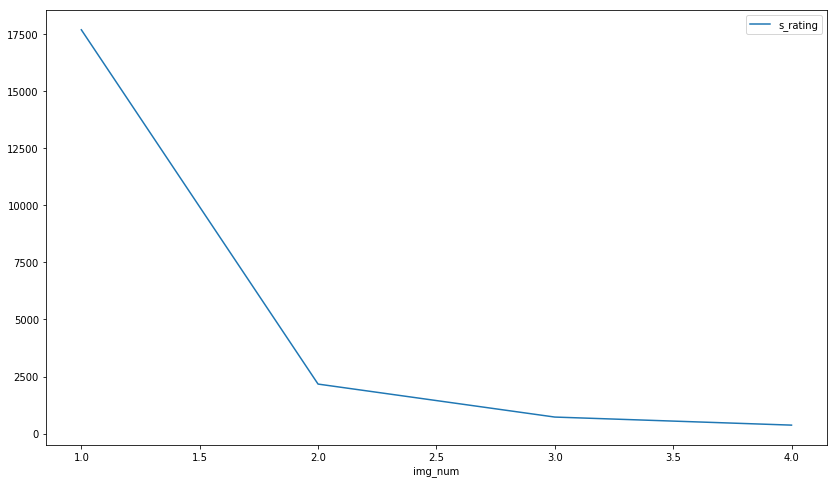

In [68]:
#line plot of the number of s_ratings against img_num
df1.plot(legend = True, figsize = (14,8));

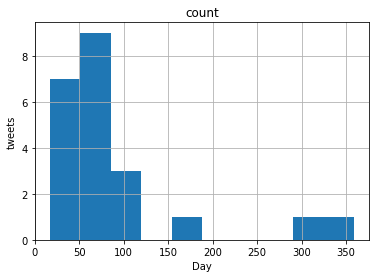

In [69]:
#Histogram of number of tweets per day
df2 = (pd.to_datetime(df['timestamp'])
       .dt.floor('30d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count'))
df2.hist()
plt.xlabel('Day')
plt.ylabel('tweets')
plt.legend()

In [70]:
df2

,date,count
0,2015-12-01,359
1,2015-11-01,295
2,2015-12-31,166
3,2016-01-30,118
4,2016-02-29,116
5,2016-06-28,87
6,2016-05-29,74
7,2016-12-25,70
8,2017-01-24,67
9,2016-07-28,61


In [71]:
pop_stage = df.dog_stage.value_counts()
pop_stage

pupper     202
doggo       74
puppo       22
floofer      7
Name: dog_stage, dtype: int64

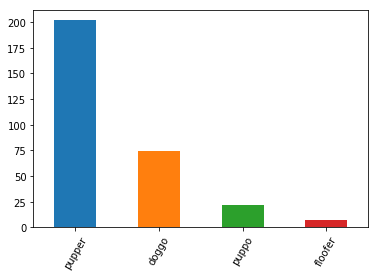

In [72]:
pop_stage.plot(kind='bar')
plt.xticks(rotation=60);

In [73]:
df3 = df.groupby('img_num')['s_rating'].value_counts()
df3

img_num  s_rating 
1        10.000000    373
         12.000000    368
         11.000000    340
         13.000000    200
         9.000000     146
         8.000000      91
         7.000000      50
         5.000000      34
         6.000000      31
         14.000000     22
         3.000000      19
         4.000000      15
         2.000000      10
         1.000000       4
         0.000000       1
         6.363636       1
2        12.000000     61
         11.000000     50
         10.000000     37
         13.000000     31
         9.000000       4
         8.000000       3
         14.000000      3
         6.000000       1
         7.000000       1
3        12.000000     19
         13.000000     17
         10.000000      9
         11.000000      7
         14.000000      6
         0.000000       1
         8.000000       1
         8.181818       1
         9.000000       1
4        13.000000     13
         12.000000      6
         11.000000      5
         14.000000 

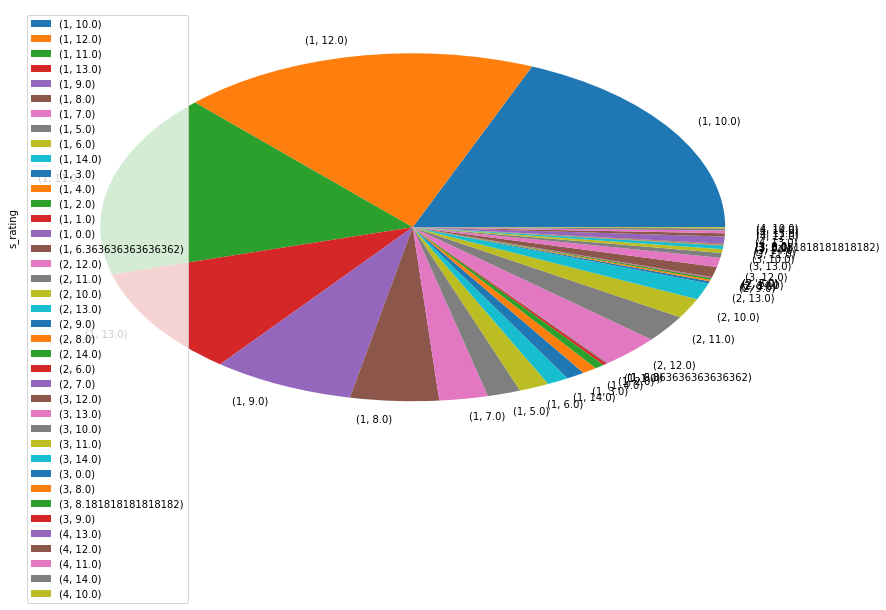

In [74]:
df3.plot(kind = 'pie', legend = True, figsize = (14,8));